In [2]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from skimage import io
from skimage.color import rgb2gray
from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny

In [3]:
airport = io.imread("airport.tif")
airport = rgb2gray(airport)

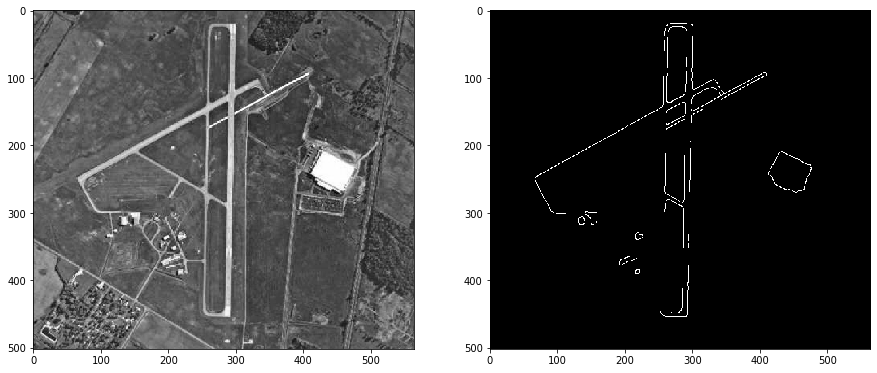

In [70]:
airport_edge = canny(airport, sigma=2, low_threshold=85, high_threshold=190)

f = plt.figure(figsize=(15,10))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax.imshow(airport,cmap="gray")
ax2.imshow(airport_edge,cmap="gray")

plt.show()

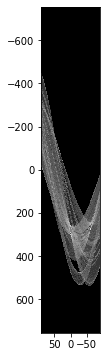

In [78]:
h, theta, d = hough_line(airport_edge, theta=None)
plt.figure(figsize=(8,6))
plt.imshow(np.log(1 + h),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
             cmap='gray', aspect=1/1.5)

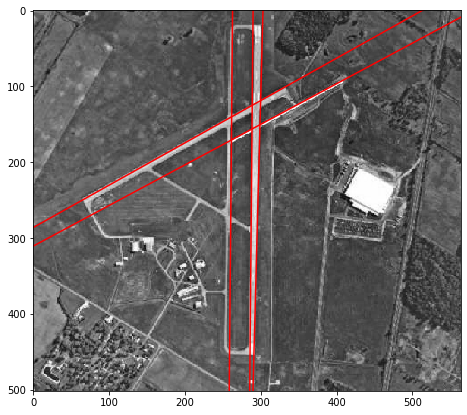

In [77]:
origin = np.array((0, airport.shape[1]))
plt.figure(figsize=(10,7))

for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    plt.plot(origin, (y0, y1), '-r')
    
plt.imshow(airport, cmap='gray')    
plt.show()

In [90]:
gauss_noise = np.random.normal(5,0.2,(airport.shape[0],airport.shape[1]))

In [91]:
airport_noise = airport + gauss_noise

In [92]:
def plot_hough_lines(image):
    edged = canny(image, sigma=2, low_threshold=85, high_threshold=190)
    h, theta, d = hough_line(edged, theta=None)
    origin = np.array((0, image.shape[1]))
    plt.figure(figsize=(10,7))

    for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
        y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
        plt.plot(origin, (y0, y1), '-r')
    
    plt.imshow(image, cmap='gray')    
    plt.show()

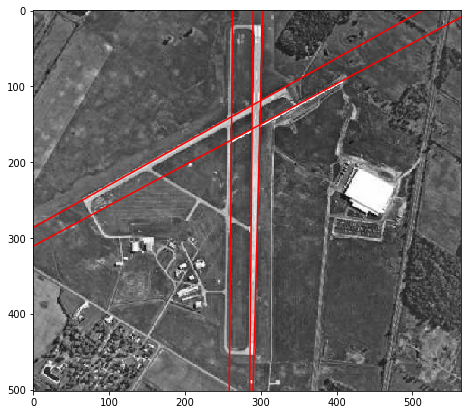

In [93]:
plot_hough_lines(airport_noise)